## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# Exploratory Data Analysis


In [ ]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Mount the google drive with google colab for importing the data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Dataset

In [ ]:
#importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project EDA/Airbnb NYC 2019.csv')

In [ ]:
#First Five row of dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#last five row of dataset 
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
#information about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#statistic summary of dataset
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#Checking for Duplication
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
len(df[df.duplicated()])

0

In [ ]:
#checking a null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#calculating the percent of missing value for each column.
(df.isnull().sum()/(len(df)))*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

# Data Cleaning

In [ ]:
#Removing null values from the dataset
df.dropna(inplace = True)

In [ ]:
# Removing ID column becouse it has no any prediction power for predict dependent variable.
df.drop(['id'], axis = 1, inplace = True)

In [ ]:
df.isna().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Univariate Analysis

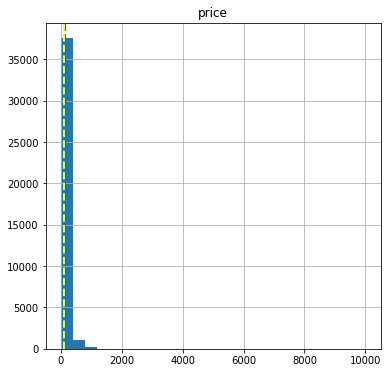

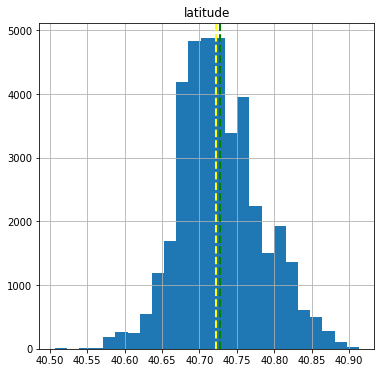

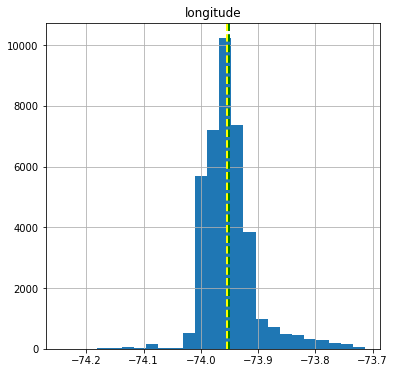

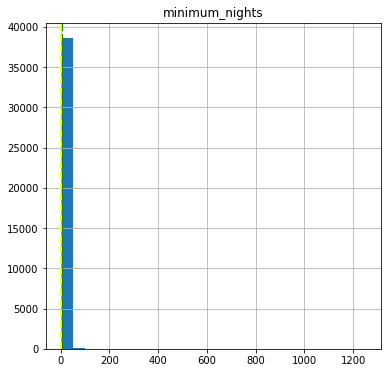

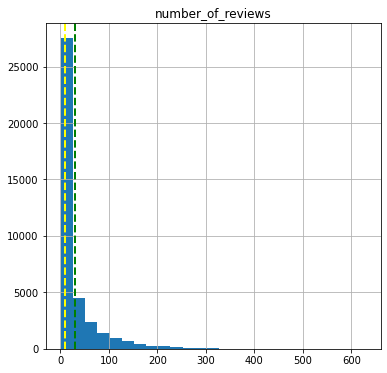

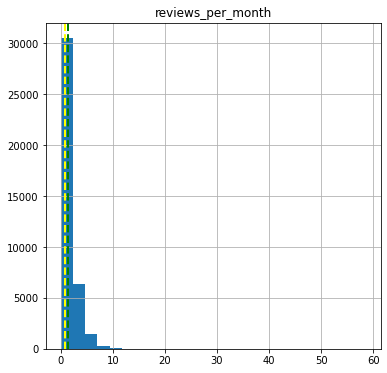

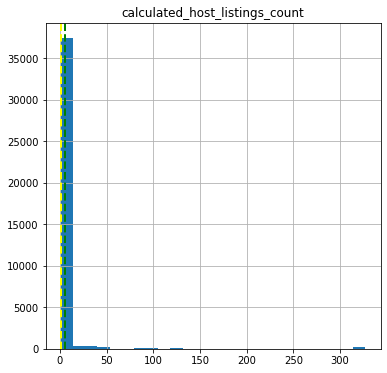

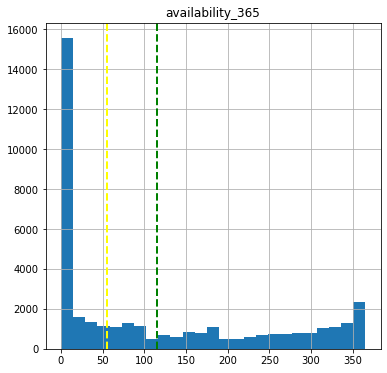

In [ ]:
# Distribustion of each colum by ploting histogram.
num = 0
for col in df[['price','latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]:
  column_names = ['price','latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
  fig = plt.figure(figsize= (6,6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins = 25, ax = ax)
  ax.axvline(feature.mean(), color = 'green', linestyle = 'dashed', linewidth = 2)
  ax.axvline(feature.median(), color = 'yellow', linestyle = 'dashed', linewidth = 2)

  plt.title(column_names[num])
  num = num + 1
  plt.plot()


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


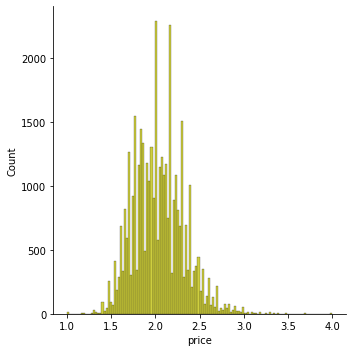

In [ ]:
#dependent variable (price)
sns.displot(np.log10(df['price']), color = 'y')
plt.show()

In [ ]:
host_df  = df['host_name'].value_counts()
host_keys = host_df.keys()[0:5]
host_values = [x for x in host_df[0:5]]

Text(0.5, 1.0, 'Top 5 Host')

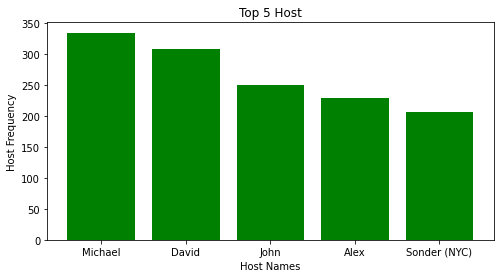

In [ ]:
# Top 5 host distribustion using bar plot
plt.figure(figsize= (8,4))
plt.bar(host_keys,host_values, color = 'green')
plt.xlabel("Host Names")
plt.ylabel('Host Frequency')
plt.title('Top 5 Host')

In [ ]:
df['neighbourhood_group'].value_counts(ascending = False)

Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: neighbourhood_group, dtype: int64

In [ ]:
neigh_group_df = df['neighbourhood_group'].value_counts(ascending = False)
neigh_group_keys = neigh_group_df.keys()
neigh_group_values = [x for x in neigh_group_df[0:5]]

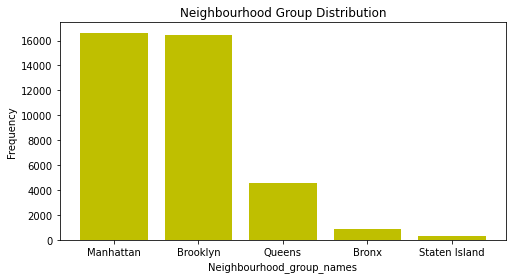

In [ ]:
# neighbourhood_group_distribution
plt.figure(figsize=(8,4))
plt.bar(neigh_group_keys, neigh_group_values, color ='y')
plt.xlabel('Neighbourhood_group_names')
plt.ylabel('Frequency')
plt.title('Neighbourhood Group Distribution')
plt.show()

In [ ]:
df['neighbourhood'].value_counts(ascending= False)

Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
                      ... 
Holliswood               2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 218, dtype: int64

In [ ]:
neigh_df = df['neighbourhood'].value_counts(ascending= False)[0:5]
neigh_keys = neigh_df.keys()
neigh_values = [x for x in neigh_df[0:5]]

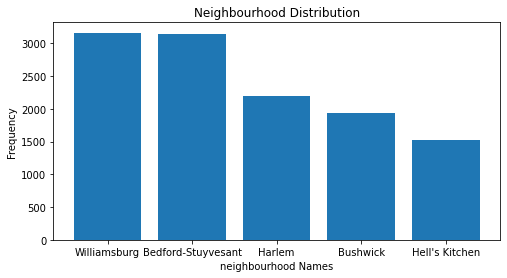

In [ ]:
plt.figure(figsize = (8,4))
plt.bar(neigh_keys,neigh_values)
plt.xlabel('neighbourhood Names')
plt.ylabel('Frequency')
plt.title('Neighbourhood Distribution')
plt.show()

In [ ]:
room_type_df  = df['room_type'].value_counts()
room_df_keys = room_type_df.keys()
room_df_values = [x for x in room_type_df[:]]

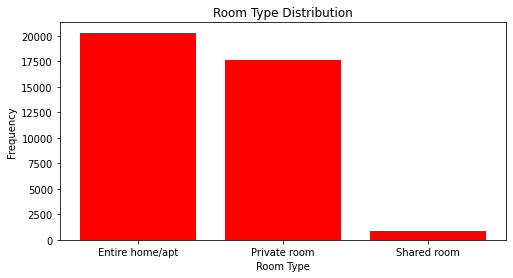

In [ ]:
plt.figure(figsize= (8,4))
plt.bar(room_df_keys, room_df_values, color = 'r')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.title('Room Type Distribution')
plt.show()

# Bivariate Analysis

In [ ]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


<Figure size 936x1224 with 0 Axes>

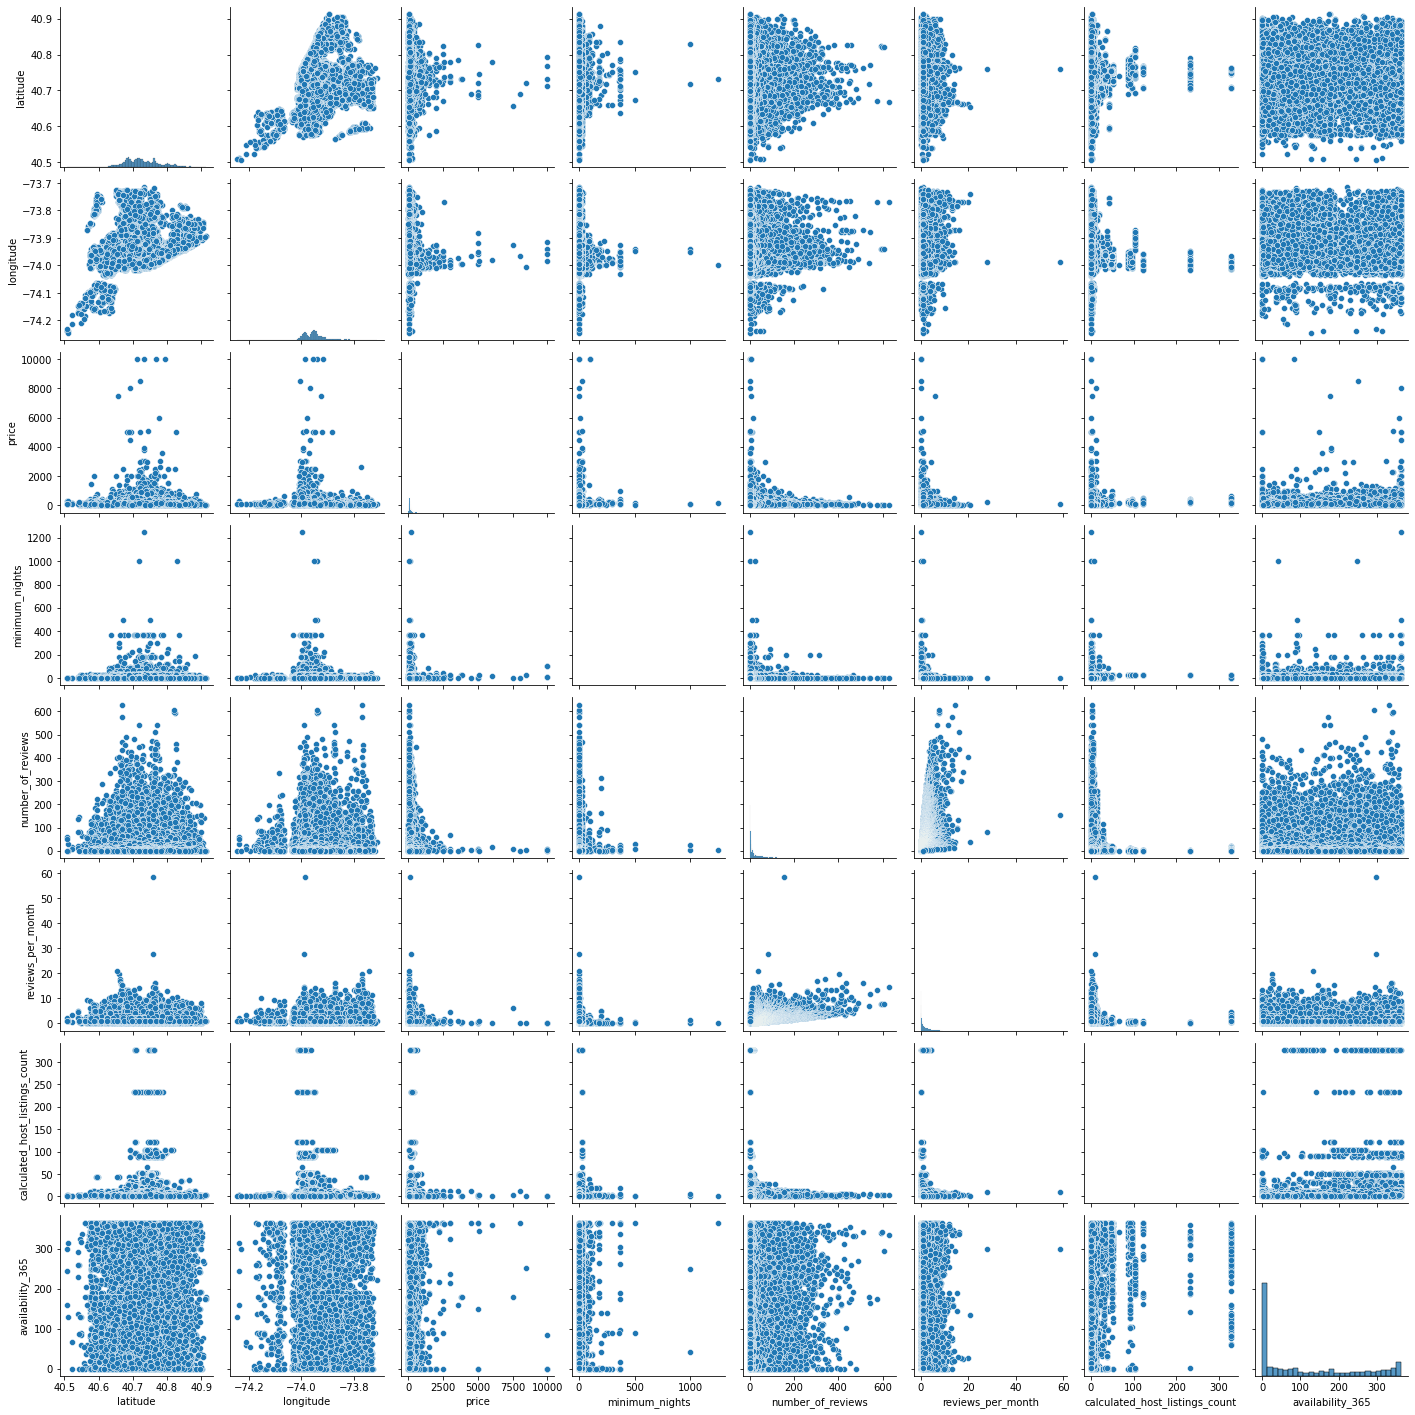

In [ ]:
# ploting pairplot for checking the corelation between each variables.
plt.figure(figsize = (13,17))
sns.pairplot(df[['latitude','longitude','room_type','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            38821 non-null  object 
 1   host_id                         38821 non-null  int64  
 2   host_name                       38821 non-null  object 
 3   neighbourhood_group             38821 non-null  object 
 4   neighbourhood                   38821 non-null  object 
 5   latitude                        38821 non-null  float64
 6   longitude                       38821 non-null  float64
 7   room_type                       38821 non-null  object 
 8   price                           38821 non-null  int64  
 9   minimum_nights                  38821 non-null  int64  
 10  number_of_reviews               38821 non-null  int64  
 11  last_review                     38821 non-null  object 
 12  reviews_per_month               

In [ ]:
numeric_df = df.drop(['name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','last_review'], axis= 1 )

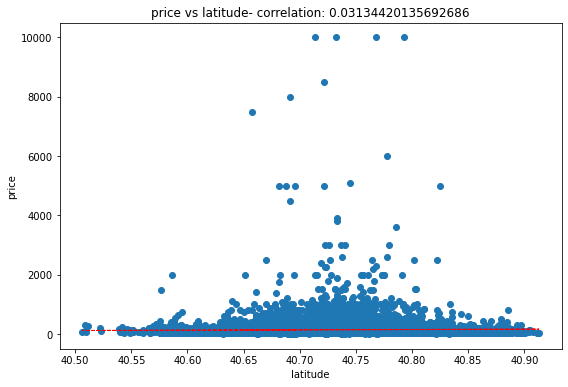

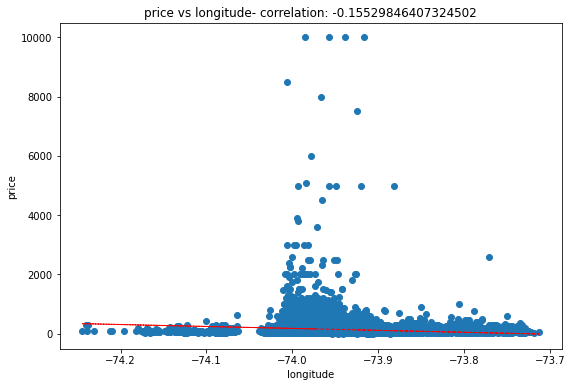

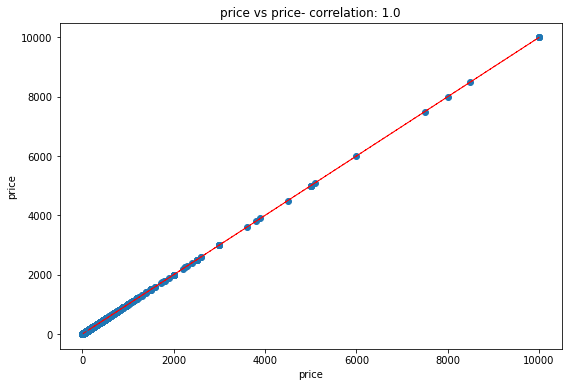

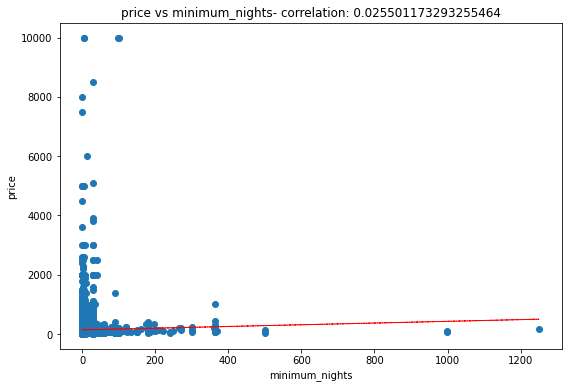

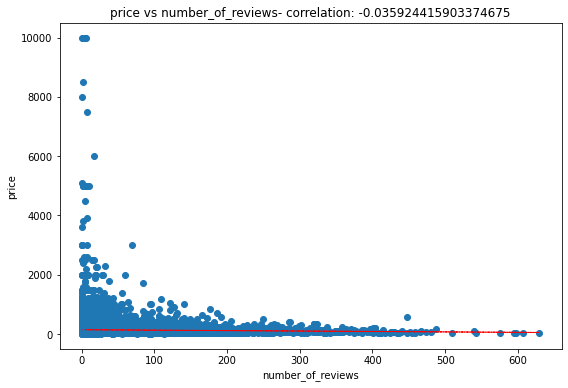

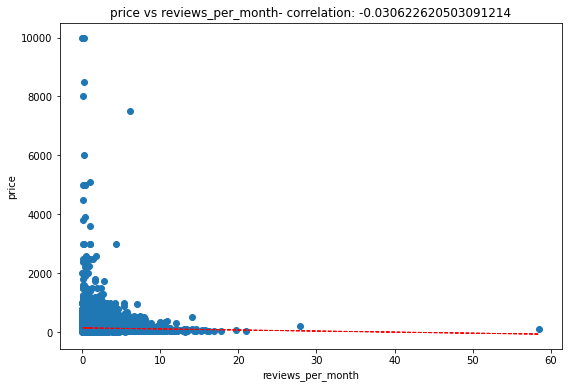

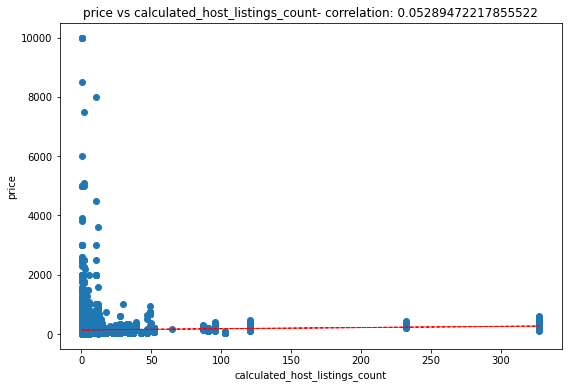

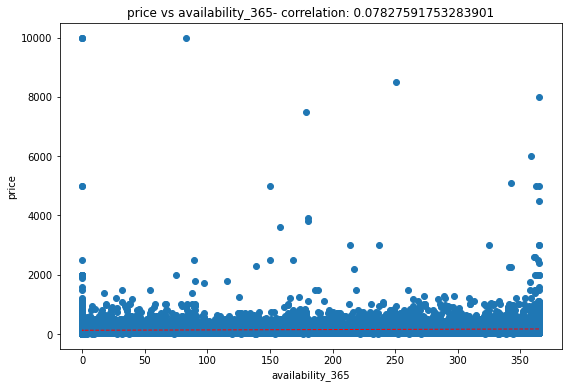

In [ ]:
# ploting the scatter plot for checking the corelation of price and other numberical features
for col in numeric_df:
  fig = plt.figure(figsize= (9,6))
  ax = fig.gca()
  feature = df[col]
  label = df['price']
  correlation = feature.corr(label)
  plt.scatter(x=feature,y = label)
  plt.xlabel(col)
  plt.ylabel('price')
  ax.set_title('price vs ' + col + '- correlation: '+str(correlation))
  z = np.polyfit(df[col],df['price'],1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col],y_hat, "r--", lw = 1)
plt.show()

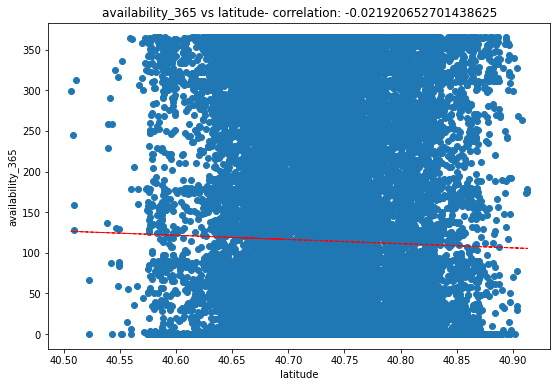

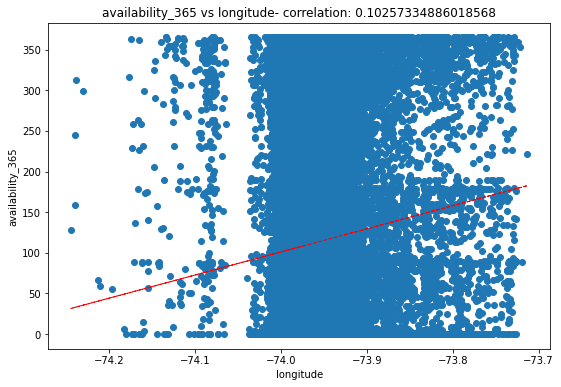

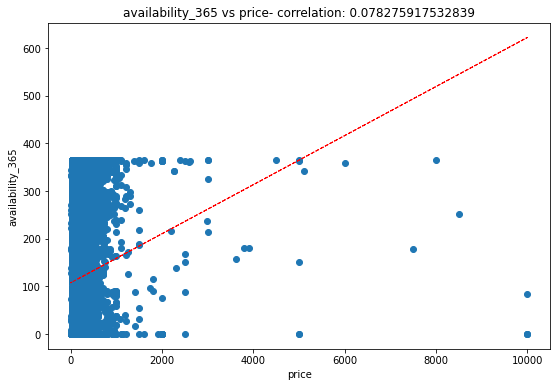

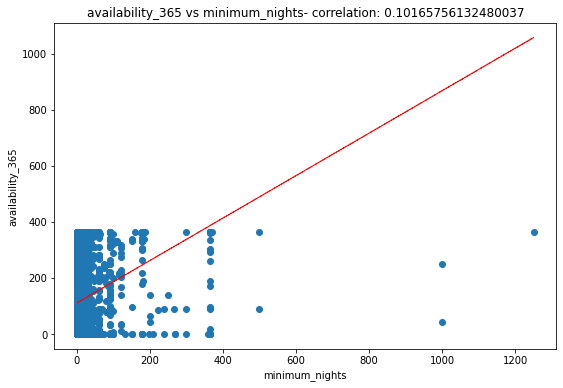

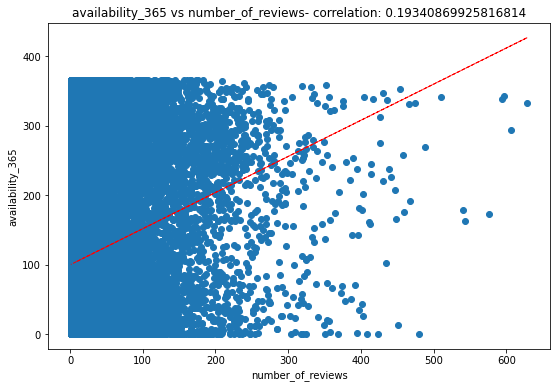

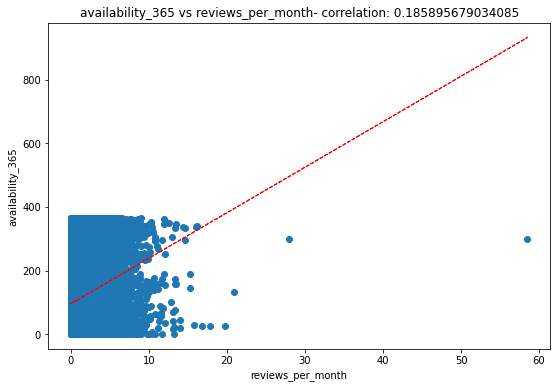

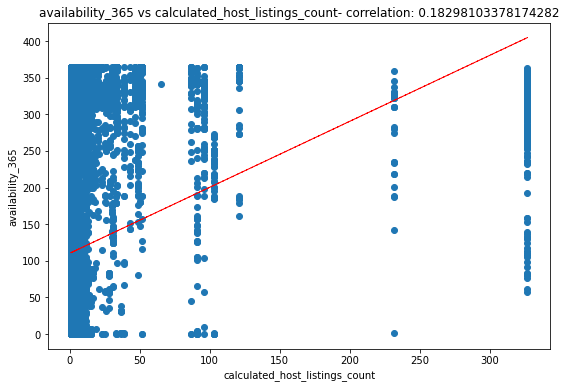

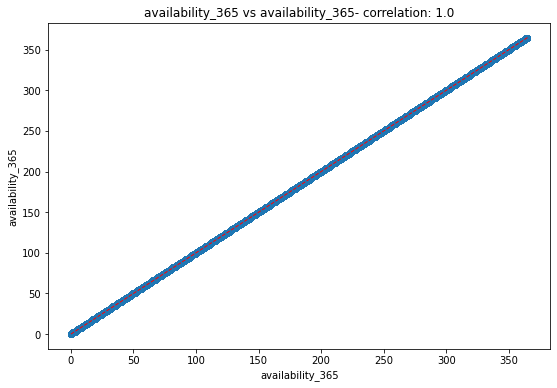

In [ ]:
# ploting the scatter plot for checkin the corelation of availability_365 with other numerical features.
for col in numeric_df:
  fig = plt.figure(figsize= (9,6))
  ax = fig.gca()
  feature = df[col]
  label = df['availability_365']
  correlation = feature.corr(label)
  plt.scatter(x=feature,y = label)
  plt.xlabel(col)
  plt.ylabel('availability_365')
  ax.set_title('availability_365 vs ' + col + '- correlation: '+str(correlation))
  z = np.polyfit(df[col],df['availability_365'],1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col],y_hat, "r--", lw = 1)
plt.show()

# Multivariate analysis

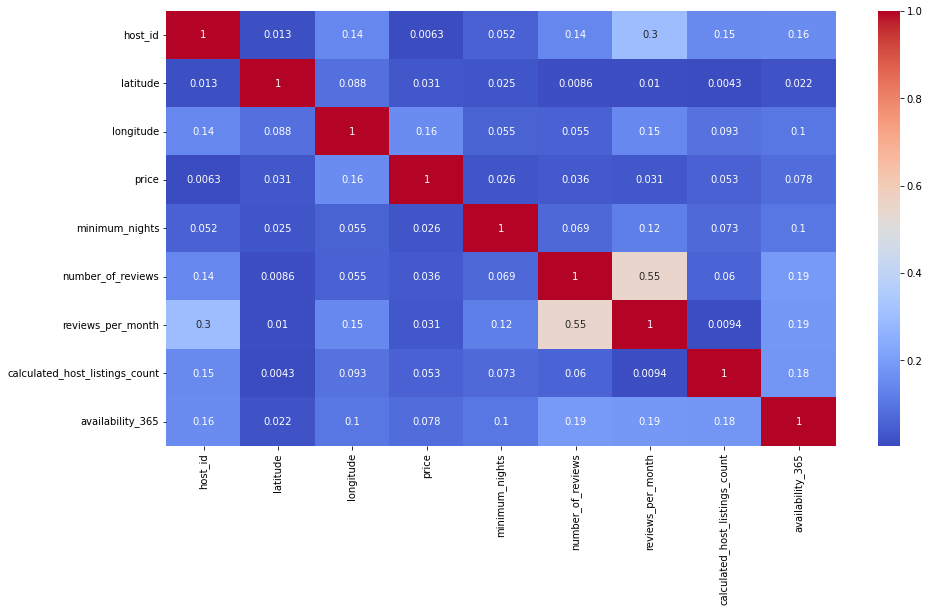

In [ ]:
plt.figure(figsize= (15,8))
correlation = df.corr()
sns.heatmap(abs(correlation),annot= True, cmap = 'coolwarm')
plt.show()

## What can we learn about different hosts and areas?

In [ ]:
# collecting host data and checking top host present in the dataset
host_df = df[['host_name', 'neighbourhood_group','neighbourhood']]
host_df['host_name'].value_counts()[0:3]

Michael    335
David      309
John       250
Name: host_name, dtype: int64

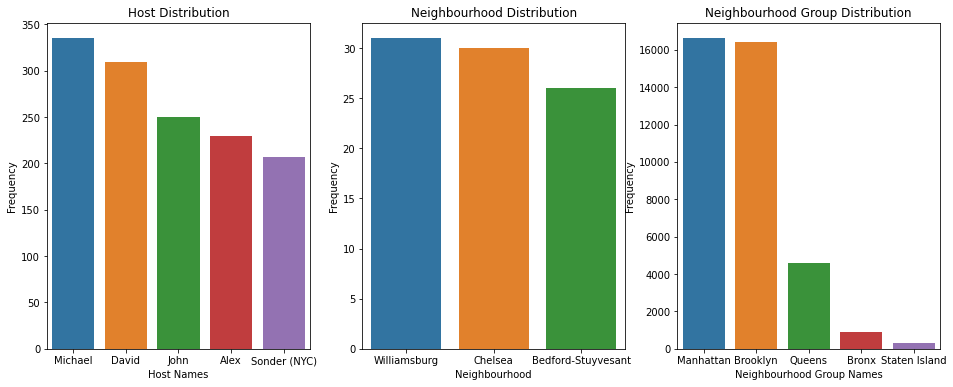

In [ ]:
# Analysis for Michael Host to check a frequency with neighbourhood gruop and neighbourhood.
Michael_df = host_df[host_df['host_name']=='Michael']['neighbourhood'].value_counts()[0:3]
Michael_keys = Michael_df.keys()
Michael_values = [x for x in Michael_df[:]]
plt.figure(figsize= (16,6))
plt.subplot(1,3,2)
sns.barplot(x = Michael_keys, y = Michael_values)
plt.xlabel('Neighbourhood')
plt.ylabel('Frequency')
plt.title('Neighbourhood Distribution')
plt.subplot(1,3,1)
sns.barplot(x = host_keys, y = host_values)
plt.xlabel('Host Names')
plt.ylabel('Frequency')
plt.title('Host Distribution')
plt.subplot(1,3,3)
sns.barplot(x = neigh_group_keys, y = neigh_group_values)
plt.xlabel('Neighbourhood Group Names')
plt.ylabel('Frequency')
plt.title('Neighbourhood Group Distribution')
plt.show()

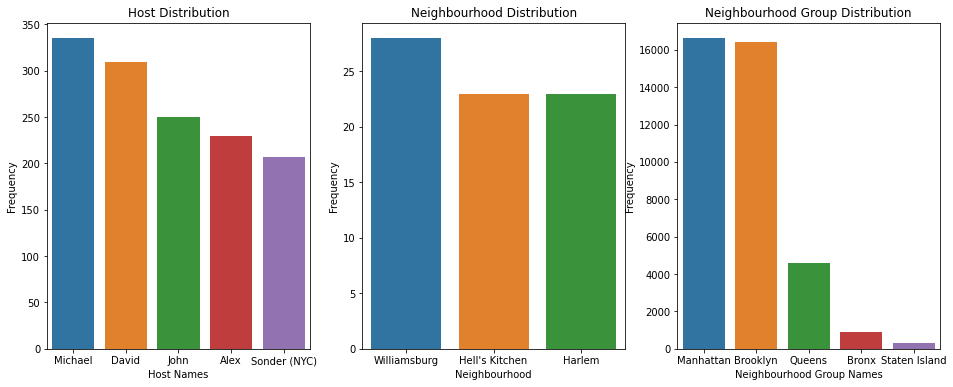

In [ ]:
# Analysis for David Host to check a frequency with neighbourhood gruop and neighbourhood.
Michael_df = host_df[host_df['host_name']=='David']['neighbourhood'].value_counts()[0:3]
Michael_keys = Michael_df.keys()
Michael_values = [x for x in Michael_df[:]]
plt.figure(figsize= (16,6))
plt.subplot(1,3,2)
sns.barplot(x = Michael_keys, y = Michael_values)
plt.xlabel('Neighbourhood')
plt.ylabel('Frequency')
plt.title('Neighbourhood Distribution')
plt.subplot(1,3,1)
sns.barplot(x = host_keys, y = host_values)
plt.xlabel('Host Names')
plt.ylabel('Frequency')
plt.title('Host Distribution')
plt.subplot(1,3,3)
sns.barplot(x = neigh_group_keys, y = neigh_group_values)
plt.xlabel('Neighbourhood Group Names')
plt.ylabel('Frequency')
plt.title('Neighbourhood Group Distribution')
plt.show()

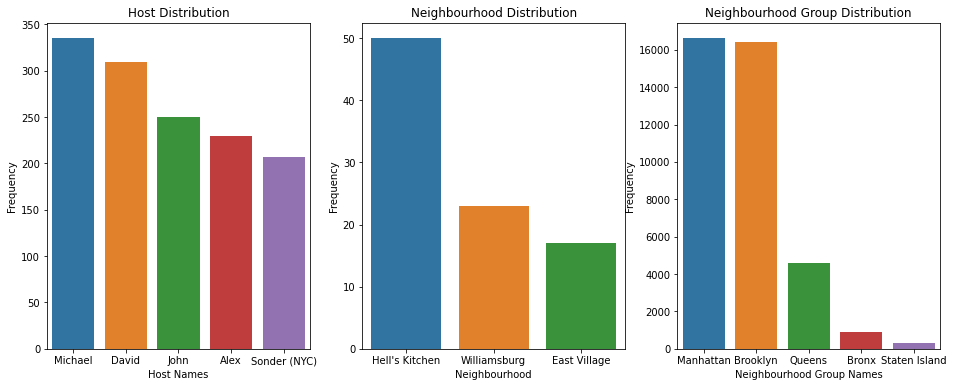

In [ ]:
# Analysis for John Host to check a frequency with neighbourhood gruop and neighbourhood.
Michael_df = host_df[host_df['host_name']=='John']['neighbourhood'].value_counts()[0:3]
Michael_keys = Michael_df.keys()
Michael_values = [x for x in Michael_df[:]]
plt.figure(figsize= (16,6))
plt.subplot(1,3,2)
sns.barplot(x = Michael_keys, y = Michael_values)
plt.xlabel('Neighbourhood')
plt.ylabel('Frequency')
plt.title('Neighbourhood Distribution')
plt.subplot(1,3,1)
sns.barplot(x = host_keys, y = host_values)
plt.xlabel('Host Names')
plt.ylabel('Frequency')
plt.title('Host Distribution')
plt.subplot(1,3,3)
sns.barplot(x = neigh_group_keys, y = neigh_group_values)
plt.xlabel('Neighbourhood Group Names')
plt.ylabel('Frequency')
plt.title('Neighbourhood Group Distribution')
plt.show()

### From the above analysis we get to know that all the top hosts are present in Williamsburg Neighbourhood and Manhattan Neighbourhood Group.

## What can we learn from predictions? (ex: locations, prices, reviews, etc)

[]

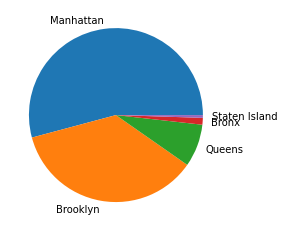

In [ ]:
# Neighbourhood gruop Price analysis using pie chart
man_df = df[df['neighbourhood_group']== 'Manhattan']
bro_df = df[df['neighbourhood_group']== 'Brooklyn']
queen_df = df[df['neighbourhood_group']== 'Queens']
bronx_df = df[df['neighbourhood_group']== 'Bronx']
state_df = df[df['neighbourhood_group']== 'Staten Island']
ng_group_list = [man_df['price'].sum(),bro_df['price'].sum(),queen_df['price'].sum(),bronx_df['price'].sum(),state_df['price'].sum()]
plt.pie(ng_group_list, labels = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'])
plt.plot()

### From the above price analysis we get to know that the Manhattan Neighbourhood group has highest price than other neighbourhood Groups.

# Which hosts are the busiest and why?

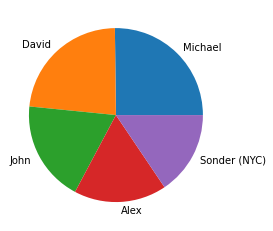

In [ ]:
# ploting graph of most busiest host
plt.pie(host_values, labels = host_keys)
plt.show()

### From the above graph we get to know that the Michael and david is busiest host than others becouse they are engage with more Neighbourhood Groups and Neighbourhoods and that's the reason behind it.

# Is there any noticeable difference of traffic among different areas and what could be the reason for it?

[]

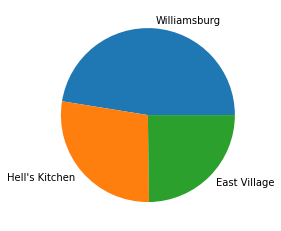

In [ ]:
# Reviews analyis of different Neighbourhood
r1 = df[df['neighbourhood']=='Williamsburg']['number_of_reviews'].sum()
r2 = df[df['neighbourhood']=="Hell's Kitchen"]['number_of_reviews'].sum()
r3 = df[df['neighbourhood']=="East Village"]['number_of_reviews'].sum()
list_of_r = [r1,r2,r3]
plt.pie(list_of_r, labels = ['Williamsburg',"Hell's Kitchen",'East Village'])
plt.plot()

There is difference among the Neighbouhood reviews the reason behind it could be the price and quality provided by the host.

### The Top 10 most Expensive Neighbourhood

In [ ]:
# collecting the name of neighbouhood and their mean price in list 
list_of_neigh = df['neighbourhood'].value_counts().keys()
list_of_mean_price = []
for name in list_of_neigh:
  neigh_df = df[df['neighbourhood']==name]
  list_of_mean_price.append(neigh_df['price'].mean())
 


In [ ]:
# making dataframes of neighbourhood and their mean price 
dict_df = {'neighbourhood': list_of_neigh,'Mean_Price': list_of_mean_price}
final_df =pd.DataFrame(dict_df)

In [ ]:
# calculating the top 10 expensive neighbourhood by sorting dataframe in descending order. 
sorted_df = final_df.sort_values(by = ['Mean_Price'], ascending = False)[0:10]
sorted_df.head()

,neighbourhood,Mean_Price
186,Sea Gate,482.500000
60,Tribeca,460.300000
74,NoHo,298.451613
79,Flatiron District,291.482759
34,SoHo,281.303136


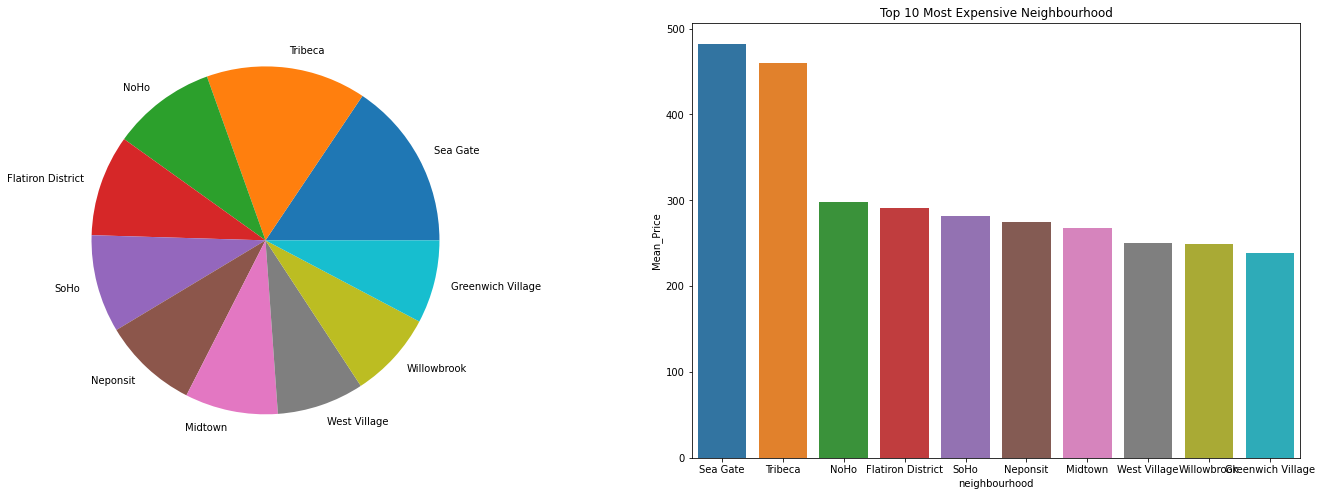

In [ ]:
# ploting the top 10 most expensive neighbourhood
plt.figure(figsize= (24,8))
plt.subplot(1,2,1)
plt.pie(sorted_df['Mean_Price'], labels= sorted_df['neighbourhood'])
plt.subplot(1,2,2)
sns.barplot(x = sorted_df['neighbourhood'],y = sorted_df['Mean_Price']).set(title ='Top 10 Most Expensive Neighbourhood')
plt.show()

## The Top 10 Least Expensive Neighbourhood

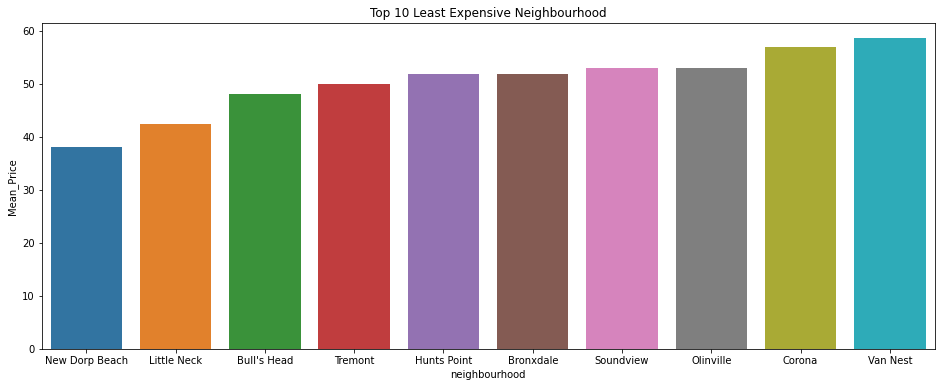

In [ ]:
# Top 10 Least Expensive Neighbourhood
least_df = final_df.sort_values(by = ['Mean_Price'], ascending = True)[0:10]
plt.figure(figsize = (16,6))
sns.barplot(x = least_df['neighbourhood'],y = least_df['Mean_Price']).set(title = 'Top 10 Least Expensive Neighbourhood')
plt.show()

# Conclusion:

### In this Exploratory Data Analysis we analyse the data of Airbnb with several key features such as price, neighbourhood, neighbourhood Group, Room type, number of reviews, etc.

*   We obtain price and neighbourhood relationship i.e., Manhattan is the most expensive airbnb region when we compare the other neighbourhood group. On the other hand the least expensive is region in Bronx.
*   same analysis we did for the neighbourhood and through out that analysis we get to know that the most expensive neighbourhood is sea gate and the other hand the least expensive is new dorp Beach.


*   Another analysis is conducted by using room type. The results show that the entire home/apt type is more preferable and the others are private room and shared room, respectively.
*   In the host analysis we found that the Michael and David are the most busiest host.


*   In the top host analysis we get to know that the top host are in Manhattan Neighbourhood Group and in williamsburg Neighbourhood.
*   from the heatmap  we get to know that the there is corelation between number of reviews and reviews per month


*   Number of reviews are also investigated to find which neighborhoods take the most review according to the neighborhood group.








